In [6]:
import json
import pandas as pd

#File paths
input_file = 'Node1_mmw_demo_output_20240614_144220.txt'
output_file = 'parsed_data.csv'

#Initializing
data_list = []

#Read data file and parse the JSON data
with open(input_file, 'r') as file:
    for line in file:
        data = json.loads(line.strip())
        timestamp = data['timestamp']
        numObj = data['numObj']
        
        # Create a row for each object
        for i in range(numObj):
            row = {
                'timestamp': timestamp,
                'range': data['range'][i],
                'azimuth': data['azimuth'][i],
                'elevation': data['elevation'][i],
                'x': data['x'][i],
                'y': data['y'][i],
                'z': data['z'][i],
                'v': data['v'][i],
                'snr': data['snr'][i],
                'rangeProfile': data['rangeProfile'],
                'noiseProfile': data['noiseProfile']
            }
            data_list.append(row)

#Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data_list)

#Displaying the DataFrame
print(df.head())

#CSV output of DataFrame
df.to_csv(output_file, index=False)

print("Finished")


    timestamp     range    azimuth  elevation      x      y    z    v   snr  \
0  1718368942  0.086833 -75.323607        0.0 -0.084  0.022  0.0  0.0  54.4   
1  1718368942  1.700433  61.053396        0.0  1.488  0.823  0.0  0.0  17.2   
2  1718368942  2.442108  61.052499        0.0  2.137  1.182  0.0  0.0  15.6   
3  1718368942  2.572842  61.034079        0.0  2.251  1.246  0.0  0.0  16.9   
4  1718368942  3.706535 -18.205200        0.0 -1.158  3.521  0.0  0.0  15.2   

                                        rangeProfile  \
0  [39.824, 47.773, 52.21, 50.344, 43.038, 38.664...   
1  [39.824, 47.773, 52.21, 50.344, 43.038, 38.664...   
2  [39.824, 47.773, 52.21, 50.344, 43.038, 38.664...   
3  [39.824, 47.773, 52.21, 50.344, 43.038, 38.664...   
4  [39.824, 47.773, 52.21, 50.344, 43.038, 38.664...   

                                        noiseProfile  
0  [14.879, 13.562, 13.75, 12.747, 15.177, 14.989...  
1  [14.879, 13.562, 13.75, 12.747, 15.177, 14.989...  
2  [14.879, 13.562, 13.

In [7]:
print(df.timestamp)
print(df.range)
print(df.azimuth)

0       1718368942
1       1718368942
2       1718368942
3       1718368942
4       1718368942
           ...    
1293    1718368970
1294    1718368970
1295    1718368970
1296    1718368970
1297    1718368970
Name: timestamp, Length: 1298, dtype: int64
0       0.086833
1       1.700433
2       2.442108
3       2.572842
4       3.706535
          ...   
1293    8.459297
1294    0.086833
1295    2.486083
1296    4.011948
1297    5.756229
Name: range, Length: 1298, dtype: float64
0      -75.323607
1       61.053396
2       61.052499
3       61.034079
4      -18.205200
          ...    
1293    -7.177943
1294   -75.323607
1295    64.991460
1296     1.785450
1297    22.028758
Name: azimuth, Length: 1298, dtype: float64


### Visualizing: Heatmap ### 

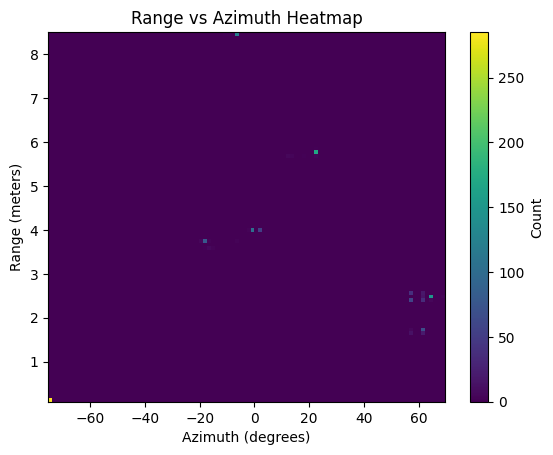

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#Plotting the heatmap
#plt.figure(figsize=(10, 6))


plt.hist2d(df['azimuth'], df['range'], bins=[100, 100], cmap='viridis')

plt.colorbar(label='Count')

#Labels
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Range (meters)')
plt.title('Range vs Azimuth Heatmap')

plt.show()


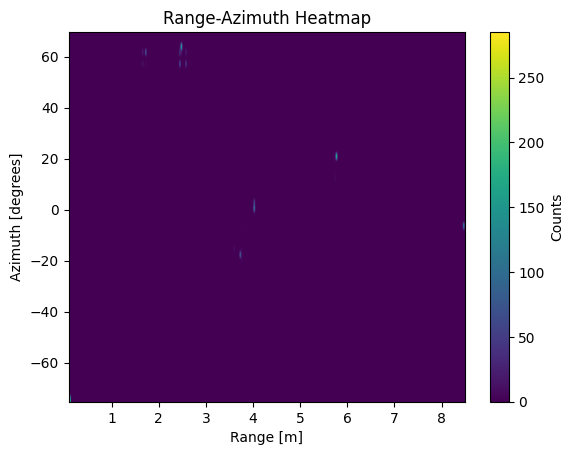

In [9]:
# Create 2D histogram
heatmap, xedges, yedges = np.histogram2d(df['range'], df['azimuth'], bins=(256, 64))

# Plot the heatmap
#fig, ax = plt.subplots(figsize=(10, 8))
fig, ax = plt.subplots()
cax = ax.imshow(heatmap.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

# Add color bar
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Counts')

# Set labels
ax.set_xlabel('Range [m]')
ax.set_ylabel('Azimuth [degrees]')
ax.set_title('Range-Azimuth Heatmap')

plt.show()

ValueError: different number of values and points

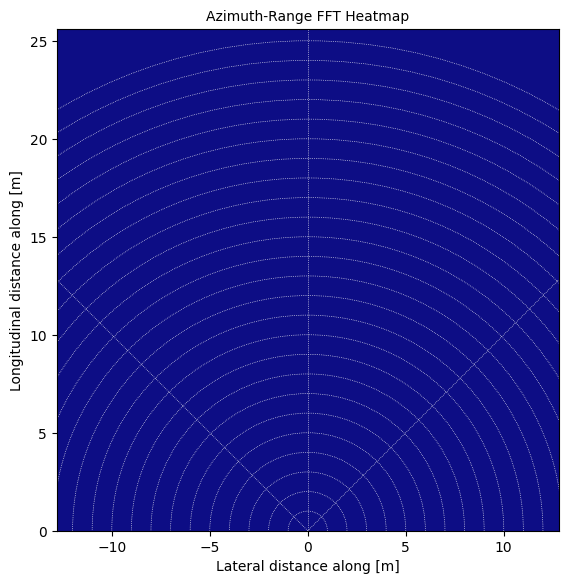

In [10]:
import numpy as np
import pandas as pd
import scipy.interpolate as spi
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.widgets as wgt

# Assuming df is your DataFrame already loaded
# Example:
# df = pd.read_csv('path_to_your_dataframe.csv') # Uncomment if you need to read the DataFrame from a CSV file

# Parameters (Adjust these based on your requirements)
tx_azimuth_antennas = 4
rx_antennas = 4
range_bins = 256
angle_bins = 64
range_res = 0.1  # Adjust based on your data
range_bias = 0

# Create 2D grid for interpolation
t = np.array(range(-angle_bins//2 + 1, angle_bins//2)) * (2 / angle_bins)
t = np.arcsin(t)
r = np.array(range(range_bins)) * range_res

range_depth = range_bins * range_res
range_width, grid_res = range_depth / 2, 400

xi = np.linspace(-range_width, range_width, grid_res)
yi = np.linspace(0, range_depth, grid_res)
xi, yi = np.meshgrid(xi, yi)

x = np.array([r]).T * np.sin(t)
y = np.array([r]).T * np.cos(t)
y = y - range_bias

# Plotting
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)

fig.tight_layout(pad=2)

cm = ax.imshow(((0,)*grid_res,) * grid_res, cmap=plt.cm.jet, extent=[-range_width, +range_width, 0, range_depth], alpha=0.95)

cursor = wgt.Cursor(ax, useblit=True, color='white', linewidth=1)

ax.set_title('Azimuth-Range FFT Heatmap'.format(angle_bins, range_bins), fontsize=10)
ax.set_xlabel('Lateral distance along [m]')
ax.set_ylabel('Longitudinal distance along [m]')

ax.plot([0, 0], [0, range_depth], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, -range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, +range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)

ax.set_ylim([0, +range_depth])
ax.set_xlim([-range_width, +range_width])

for i in range(1, int(range_depth)+1):
    ax.add_patch(pat.Arc((0, 0), width=i*2, height=i*2, angle=90, theta1=-90, theta2=90, color='white', linewidth=0.5, linestyle=':', zorder=1))

# Prepare data for heatmap
heatmap, xedges, yedges = np.histogram2d(df['range'], df['azimuth'], bins=(grid_res, grid_res))

# Interpolate data
zi = spi.griddata((x.ravel(), y.ravel()), heatmap.ravel(), (xi, yi), method='linear')
zi = zi[:-1, :-1]

cm.set_array(zi[::-1, ::-1])  # Rotate 180 degrees
cm.autoscale()  # Reset colormap

# Show plot
plt.show()




In [11]:
print(df.size)
print(df.azimuth.size)
print(df.range.size)

14278
1298
1298


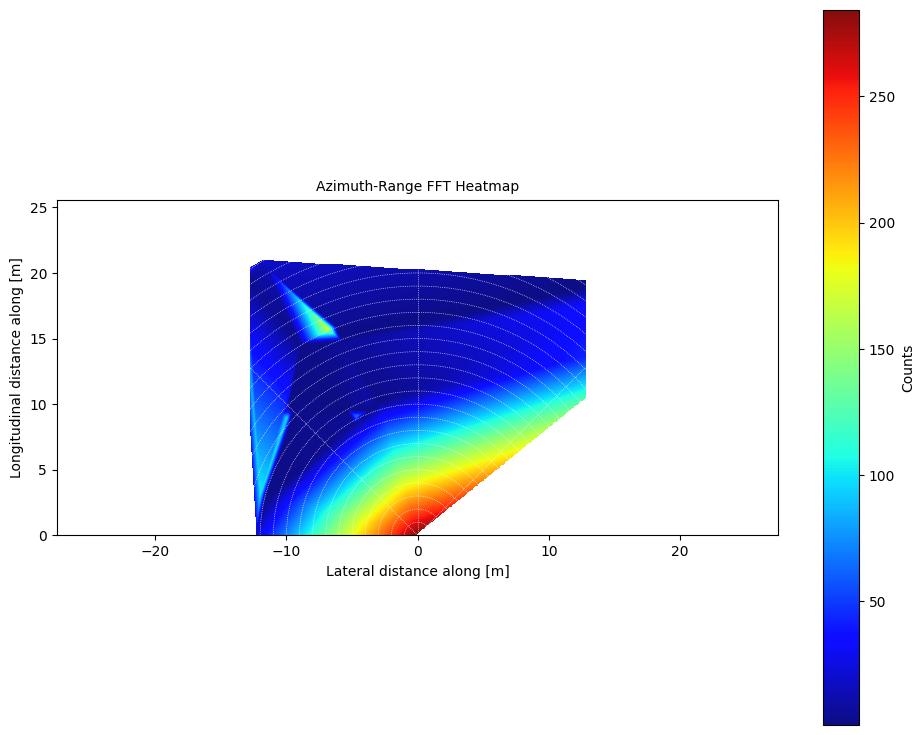

In [13]:
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
import matplotlib.widgets as wgt
import matplotlib.patches as pat

# Parameters
tx_azimuth_antennas = 4  
rx_antennas = 4  
range_bins = 256
angle_bins = 64
range_res = 0.1  
range_bias = 0.0 

# Calculate coordinates
t = np.linspace(-1, 1, angle_bins)
t = np.arcsin(t)
r = np.linspace(0, range_bins * range_res, range_bins)

range_depth = range_bins * range_res
range_width, grid_res = range_depth / 2, 400

xi = np.linspace(-range_width, range_width, grid_res)
yi = np.linspace(0, range_depth, grid_res)
xi, yi = np.meshgrid(xi, yi)

#x and y for bins
x = np.outer(r, np.sin(t))
y = np.outer(r, np.cos(t))
y = y - range_bias

#2D histogram
heatmap, xedges, yedges = np.histogram2d(df['range'], df['azimuth'], bins=(range_bins, angle_bins))

#interpolation
x_points = x.ravel()
y_points = y.ravel()
values = heatmap.T.ravel()

#zero values filtered
mask = values > 0
x_points = x_points[mask]
y_points = y_points[mask]
values = values[mask]

zi = spi.griddata((x_points, y_points), values, (xi, yi), method='linear')
zi = zi[:-1, :-1]

#plot
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)

fig.tight_layout(pad=2)

cm = ax.imshow(zi[::-1, ::-1], cmap=plt.cm.jet, extent=[-range_width, range_width, 0, range_depth], alpha=0.95)
cursor = wgt.Cursor(ax, useblit=True, color='white', linewidth=1)

ax.set_title('Azimuth-Range FFT Heatmap'.format(angle_bins, range_bins), fontsize=10)
ax.set_xlabel('Lateral distance along [m]')
ax.set_ylabel('Longitudinal distance along [m]')

#grid lines
ax.plot([0, 0], [0, range_depth], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, -range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, +range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)

#range circles
for i in range(1, int(range_depth)+1):
    ax.add_patch(pat.Arc((0, 0), width=i*2, height=i*2, angle=90, theta1=-90, theta2=90, color='white', linewidth=0.5, linestyle=':', zorder=1))

plt.colorbar(cm, ax=ax, label='Counts')
plt.show()



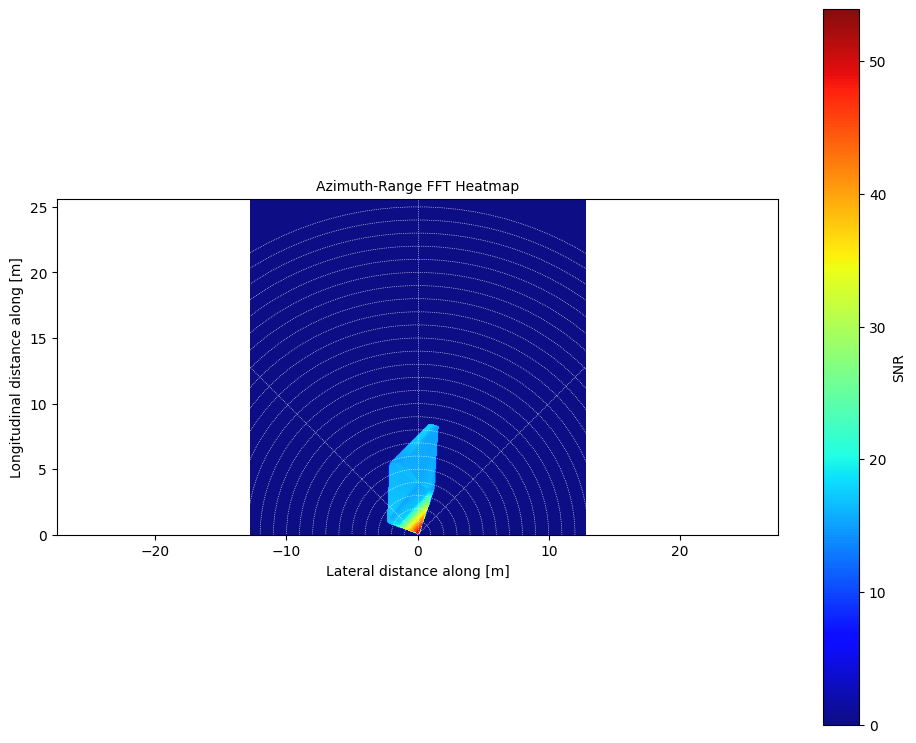

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import scipy.interpolate as spi
import pandas as pd  


# Parameters
tx_azimuth_antennas = 4  
rx_antennas = 4  
range_bins = 256
angle_bins = 64
range_res = 0.1  
range_bias = 0.0 

# Calculate coordinates
t = np.linspace(-1, 1, angle_bins)
t = np.arcsin(t)
r = np.linspace(0, range_bins * range_res, range_bins)

range_depth = range_bins * range_res
range_width, grid_res = range_depth / 2, 400

xi = np.linspace(-range_width, range_width, grid_res)
yi = np.linspace(0, range_depth, grid_res)
xi, yi = np.meshgrid(xi, yi)

# x and y for bins
x = np.outer(r, np.sin(t))
y = np.outer(r, np.cos(t))
y = y - range_bias

# Interpolation
azimuth_radians = np.radians(df['azimuth'])
x_points = df['range'] * np.sin(azimuth_radians)
y_points = df['range'] * np.cos(azimuth_radians)
values = df['snr']

# Interpolate SNR values
zi = spi.griddata((x_points, y_points), values, (xi, yi), method='linear')
zi = np.nan_to_num(zi)  # Replace NaN values with zero

# Plot
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)

fig.tight_layout(pad=2)

cm = ax.imshow(zi[::-1, ::-1], cmap=plt.cm.jet, extent=[-range_width, range_width, 0, range_depth], alpha=0.95)
cursor = wgt.Cursor(ax, useblit=True, color='white', linewidth=1)

ax.set_title('Azimuth-Range FFT Heatmap', fontsize=10)
ax.set_xlabel('Lateral distance along [m]')
ax.set_ylabel('Longitudinal distance along [m]')

# Grid lines
ax.plot([0, 0], [0, range_depth], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, -range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, +range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)

# Range circles
for i in range(1, int(range_depth)+1):
    ax.add_patch(pat.Arc((0, 0), width=i*2, height=i*2, angle=90, theta1=-90, theta2=90, color='white', linewidth=0.5, linestyle=':', zorder=1))

# Colorbar for SNR values
plt.colorbar(cm, ax=ax, label='SNR')
plt.show()